In [91]:
!sudo apt-get install libpcl-dev -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libpcl-dev is already the newest version (1.8.1+dfsg1-2ubuntu2.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [92]:
pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [93]:
import cv2
import torch
import matplotlib.pyplot as plt
import numpy as np

model_type =  "DPT_Large"
midas = torch.hub.load("intel-isl/MiDaS", model_type)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform

Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master
Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


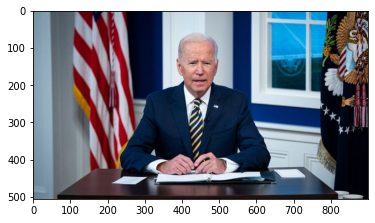

In [94]:
img = cv2.imread("test.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
input_batch = transform(img).to(device)
plt.imshow(img)

In [95]:
with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output_msk = 1/prediction.cpu().numpy()

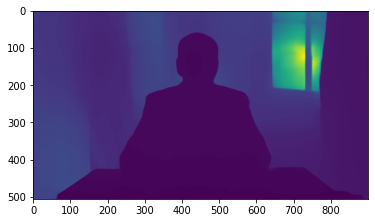

In [96]:
plt.imshow(output_msk)

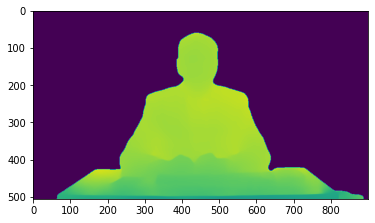

In [97]:
test=output_msk.copy()
test[output_msk>0.05]=0
plt.imshow(test)

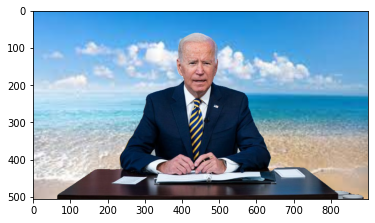

In [98]:
back=cv2.imread("back.png")
back=cv2.resize(back,(img.shape[1],img.shape[0]))
back=cv2.cvtColor(back,cv2.COLOR_BGR2RGB)
filter_img=img.copy()

filter_img[np.where(output_msk>0.05)]=back[np.where(output_msk>0.05)]
plt.imshow(filter_img)

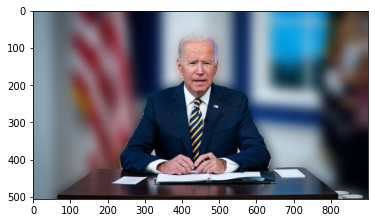

In [99]:
test1_img=img.copy()
back=cv2.GaussianBlur(img,(0,0),15)

test1_img[np.where(output_msk>0.05)]=back[np.where(output_msk>0.05)]
plt.imshow(test1_img)

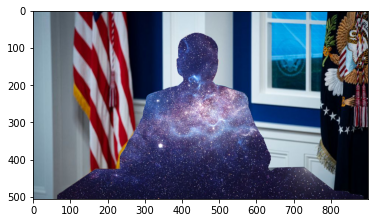

In [100]:
test1_img=img.copy()
back=cv2.imread("universe.png")
back=cv2.resize(back,(img.shape[1],img.shape[0]))
back=cv2.cvtColor(back,cv2.COLOR_BGR2RGB)

test1_img[np.where(output_msk<0.05)]=back[np.where(output_msk<0.05)]
plt.imshow(test1_img)